# Análisis de ventas a través de los comportamientos del consumidor

## Motivación


El conjunto de datos es una muestra de transacciones realizadas en una tienda. Nos gustaría conocer mejor el comportamiento de compra del cliente frente a diferentes productos. Un primer problema es, entonces, predecir el monto de la compra de un usuario con la ayuda de la información contenida en las otras variables.


El problema de clasificación también se puede resolver en este conjunto de datos, ya que varias variables son categóricas y algunos otros enfoques podrían ser por ejemplo “Predecir la edad del consumidor” o incluso “Predecir la categoría de los bienes comprados”.


Este conjunto de datos también es particularmente conveniente para agrupar y quizás encontrar diferentes grupos de consumidores dentro de él como así también ser capaces de generar recomendaciones de productos.

## Breve exploración del dataset

El dataset *retail_sales.zip* se encuentra en el siguiente classroom: https://classroom.google.com/u/0/c/MzE2MDE2MTY4NzBa descargarlo y descomprimirlo.

In [1]:
import pandas as pd
import seaborn
import matplotlib as plt
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

### Cargamos el dataset

In [2]:
retail_sales = pd.read_csv('retail_sales.csv')

In [3]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [4]:
retail_sales.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
193241,1005840,P00329442,F,0-17,0,C,1,0,5,8.0,NaN,52.83
14845,1002200,P00260442,M,36-45,1,C,3,0,1,15.0,NaN,78.59
198818,1000714,P0096442,M,18-25,4,B,2,0,4,5.0,12.0,21.81
472138,1000759,P00034242,F,55+,3,C,1,0,5,8.0,14.0,53.66
270637,1005703,P00310842,M,55+,1,C,2,1,6,8.0,10.0,161.00


### Descripción de las columnas:

- $\textit{User_ID}$: identificador unívoco de cada usuario.
- $\textit{Product_ID}$: identificador unívoco de cada producto.
- $\textit{Gender}$: género del usuario, F $\rightarrow$ Femenino, M $\rightarrow$ Masculino.
- $\textit{Age}$: edad del usuario representada por rangos, es decir, no se conoce la edad exacta del usuario sino el rango de edad al cual pertenece.
- $\textit{Occupation}$: ocupación del usuario, existen 21 ocupaciones distintas, cada una de ellas está identificada con un número del 0 al 20.
- $\textit{City_Category}$: categoría de ciudad en la que vive el usuario, existen 3 categorías: A - B - C.
- $\textit{Stay_In_Current_City_Years}$: tiempo de permanecia del usuario en la ciudad actual expresada en años. Nota: el valor 0 significa que el tiempo de permanencia del usuario en esa ciudad ha sido menor a un año, no es un valor inválido.
- $\textit{Marital_Status}$: estado civil del usuario, valor 0 $\rightarrow$ Soltero, valor 1 $\rightarrow$ Casado
- $\textit{Product_Category_1}$: categoria 1 del producto.
- $\textit{Product_Category_2}$: categoria 2 del producto, probablemente sea una subcategoria de 1.
- $\textit{Product_Category_3}$: categoria 3 del producto, probablemente sea una subcategoria de 2.
- $\textit{Purchase}$: precio que el usuario pagó por el producto expresado en dólares.

**En Primer lugar se extraen las columnas *Product_Category_2* y *Product_Category_3***

In [5]:
dataset = retail_sales.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [6]:
dataset.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
327420,1002405,P00227842,M,51-55,8,C,1,1,2,159.43
56964,1002801,P00028842,F,26-35,3,A,1,1,6,125.80
362314,1001757,P00160942,M,26-35,4,B,4+,0,1,119.91
533269,1004083,P00163442,M,55+,14,A,0,0,6,126.96
9995,1001530,P00151742,M,26-35,4,A,1,1,8,79.67


In [7]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,93.338599
std,1.714393e+03,6.52412,0.491612,3.750701,49.810221
min,1.000001e+06,0.00000,0.000000,1.000000,1.850000
25%,1.001495e+06,2.00000,0.000000,1.000000,58.660000
50%,1.003031e+06,7.00000,0.000000,5.000000,80.620000
75%,1.004417e+06,14.00000,1.000000,8.000000,120.730000
max,1.006040e+06,20.00000,1.000000,18.000000,239.610000


**1. Cantidad total de órdenes, usuarios y productos.**

In [8]:
cantidad = ['User_ID', 'Product_ID']

In [9]:
print('El número total de órdenes asciende a ', dataset['User_ID'].count())
cant = pd.DataFrame(dataset[cantidad].nunique())
cant

El número total de órdenes asciende a  537577


,0
User_ID,5891
Product_ID,3623


**2. Calcular estadísticos: media, mediana, moda, desviación estándar, valor mínimo, valor máximo de la cantidad de compras por usuario. Gráficar. A qué distribución conocida corresponde? Qué se puede concluir?**

In [10]:
user_purch = pd.DataFrame(dataset.groupby('User_ID').size())
user_purch.describe()

,0
count,5891.000000
mean,91.253947
std,105.929800
min,5.000000
25%,25.000000
50%,53.000000
75%,114.000000
max,1025.000000


In [11]:
print('La mediana de compra por cada usuario se ubicó en ', user_purch.median(), '\n', 'y la moda de las compras por usuario fue igual a ', user_purch.mode())

La mediana de compra por cada usuario se ubicó en  0    53.0
dtype: float64 
 y la moda de las compras por usuario fue igual a      0
0  17


/home/simon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(0, 1116.6209571460904)

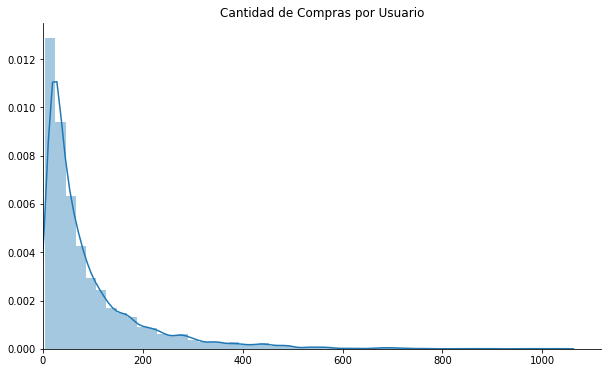

In [12]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(user_purch)
seaborn.despine()
plt.pyplot.title("Cantidad de Compras por Usuario")
plt.pyplot.xlim(0,None)

La cantidad de compras por usuario es marcadamente asimétrica derecha, lo que es señal de que esta variable sigue una distribución exponencial. Esto significa que el comportamiento más repetido (la moda) es una pequeña cantidad de compras (17), y que las compras de mayores cantidades son cada vez más extrañas entre los usuarios. Se puede observar además en base a la mediana, que la mitad de los usuarios compró como máximo 53 veces, aunque el promedio de compras sea de 91.25. Este último valor es afectado por la clara asimetría de la distribución, por lo que no es una buena medida representativa de los datos.

Text(0.5,1,'ViolinPlot - Cantidad de Compras por Usuario')

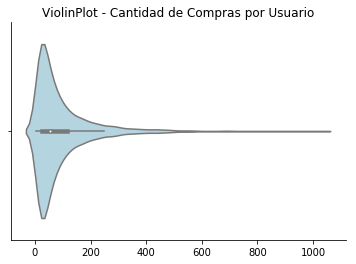

In [13]:

seaborn.violinplot(user_purch, color='lightblue', orient='h')
seaborn.despine()
plt.pyplot.title("ViolinPlot - Cantidad de Compras por Usuario")


El resultado obtenido en el ViolinPlot coincide con la gráfica observada previamente: valores concentrados en números altos de la serie, lo que responde a la asimetría de los datos. En estos casos, tanto el ViolinPlot como el BoxPlot no resultan de utilidad para la detección de **valores atípicos** 

**3. Calcular media, mediana, desviación estándar, valor mínimo, valor máximo de los valores de compras. Determinar valores atípicos (outliers) y graficar. El porcentaje de valores atípicos es muy alto? Analizar por género, edad, ocupación de los consumidores.**

In [14]:
purchase = pd.DataFrame(dataset['Purchase'])
purchase.describe()

,Purchase
count,537577.000000
mean,93.338599
std,49.810221
min,1.850000
25%,58.660000
50%,80.620000
75%,120.730000
max,239.610000


In [15]:
print('La mediana de cada compra se ubicó en ', purchase.median(), '\n', 'y la moda de las compras fue igual a ', purchase.mode())

La mediana de cada compra se ubicó en  Purchase    80.62
dtype: float64 
 y la moda de las compras fue igual a     Purchase
0     68.55


(0, 262.98460164028415)

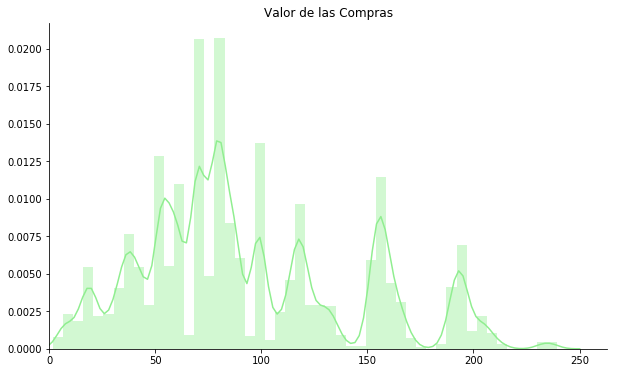

In [16]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(purchase, color='lightgreen')
seaborn.despine()
plt.pyplot.title("Valor de las Compras")
plt.pyplot.xlim(0,None)

Como se ve en el gráfico, los datos no siguen una distribución normal en todo su rango. Probablemente entre el rango 0-150 podría asimilarse a una función normal, pero viendo la serie en su totalidad, esta presenta una asimetría derecha, dado que en el extremo derecho de la serie aún persiste una frecuencia elevada de montos comprados.

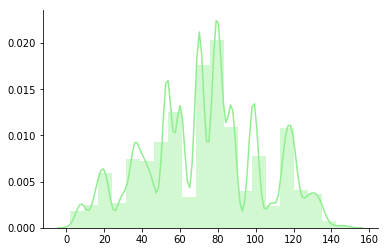

In [17]:
seaborn.distplot(purchase[purchase < 150].dropna(),bins=20, color='lightgreen')
seaborn.despine()

Text(0.5,1,'ViolinPlot - Cantidad de Compras por Usuario')

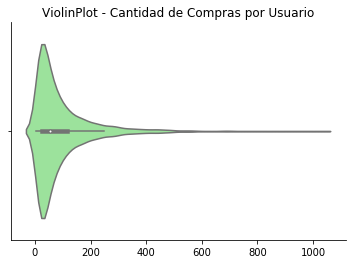

In [18]:
seaborn.violinplot(user_purch, color='lightgreen', orient='h')
seaborn.despine()
plt.pyplot.title("ViolinPlot - Cantidad de Compras por Usuario")

*Identificación de los valores atípicos*

In [19]:
q1=np.percentile(purchase,25)

In [20]:
q3=np.percentile(purchase,75)
q3

120.73

In [21]:
iqr=q3-q1
iqr

62.07000000000001

In [22]:
q4 = q3+iqr*1.5
q4

213.83500000000004

In [23]:
print( "Cantidad de valores mayores al limite superior :",len(dataset[dataset['Purchase'] > q4]))

Cantidad de valores mayores al limite superior : 2665


In [24]:
print( "Proporción de valores mayores al limite superior :", len(dataset[dataset['Purchase'] > q4])/len(dataset['Purchase']))

Proporción de valores mayores al limite superior : 0.004957429354306453


In [25]:
purch_out = dataset[dataset['Purchase'] > q4]

**Outliers por Género**

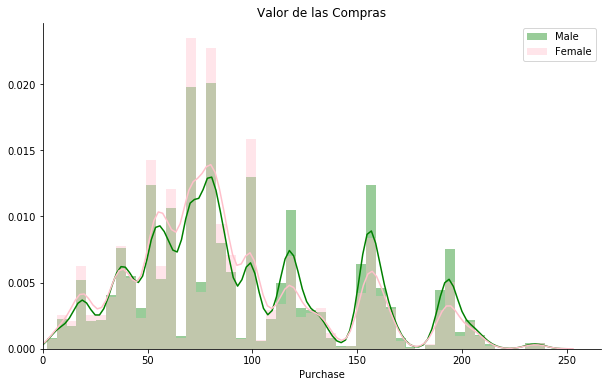

In [26]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['Gender'] == 'M']['Purchase'], 
                label='Male', color='green')
seaborn.distplot(
    dataset[dataset['Gender'] == 'F']['Purchase'], 
                label='Female', color='pink')
seaborn.despine()
plt.pyplot.title("Valor de las Compras")
plt.pyplot.xlim(0,None)
plt.pyplot.legend()

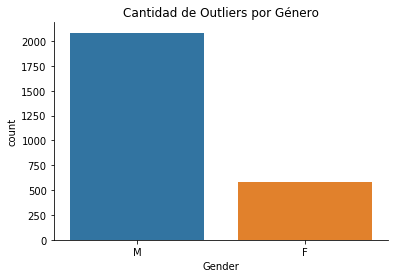

In [27]:
seaborn.countplot(x='Gender', data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Género")
seaborn.despine()

**Outliers por Edad**

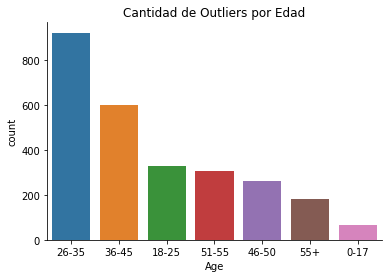

In [28]:
seaborn.countplot(x='Age', data=purch_out, order = purch_out['Age'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Edad")
seaborn.despine()

**Outliers por Ocupación**

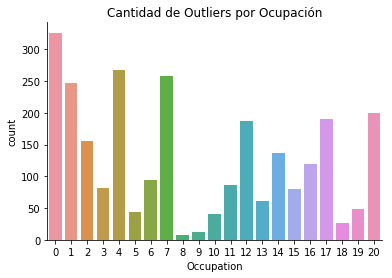

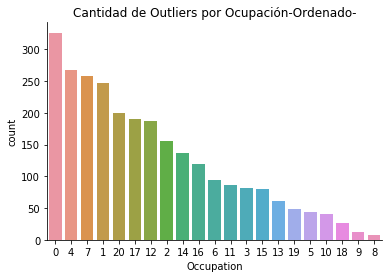

In [29]:
plt.pyplot.figure(figsize=(6,4))
seaborn.countplot(x='Occupation', data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Ocupación")
seaborn.despine()

plt.pyplot.figure(figsize=(6,4))
seaborn.countplot(x='Occupation', data=purch_out, order = purch_out['Occupation'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Ocupación-Ordenado-")
seaborn.despine()

**4. Top productos más vendidos, a qué categorias pertenecen? (tener en cuenta solo la columna Product_Category_1 ). Estos productos son consumidos por usuarios de todas las edades o algunos rangos en particular? Graficar productos más vendidos por edad y por género**

In [30]:
prod_sold = pd.DataFrame(dataset.groupby('Product_ID').size())
top_10 = prod_sold.sort_values(0, ascending=False)[0:10]

In [31]:
top_10

,0
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00145042,1384


In [32]:
most_sell = top_10.index

In [33]:
top10 = pd.DataFrame(dataset, columns=["Product_ID","Age","Gender", 'Product_Category_1'])

In [34]:
top10=top10[top10['Product_ID'].isin(most_sell)]

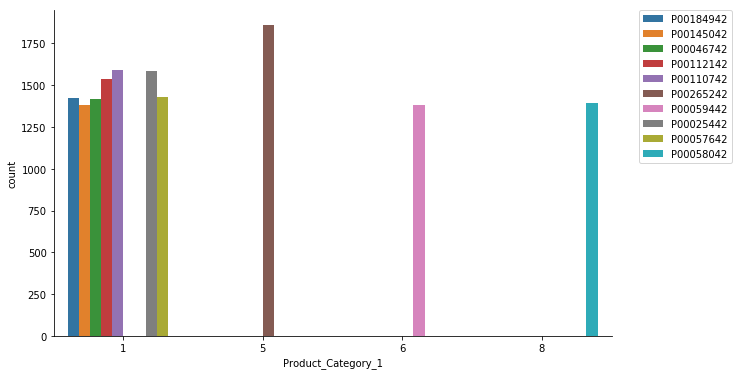

In [35]:
plt.pyplot.figure(figsize=(10,6)) 
seaborn.countplot(data=top10, x='Product_Category_1', 
                  hue='Product_ID') 
plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [36]:
cat_1 = len(top10[top10['Product_Category_1'] == 1])/len(top10['Product_Category_1'])

In [37]:
print('El ', cat_1, 'de los productos más vendidos pertence a la categoría 1')

El  0.6909854087547471 de los productos más vendidos pertence a la categoría 1


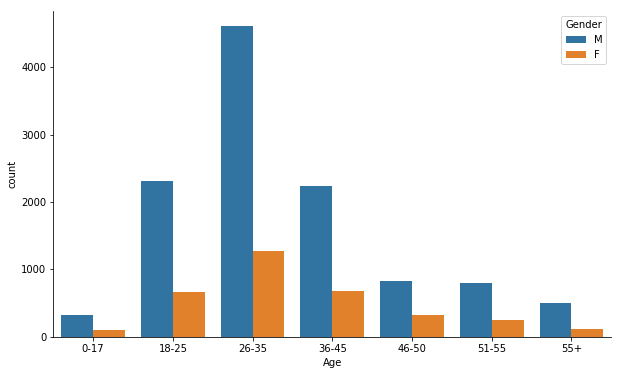

In [38]:
plt.pyplot.figure(figsize=(10,6)) 
order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
seaborn.countplot(data=top10, x='Age', 
                  hue='Gender', order=order) 
seaborn.despine()

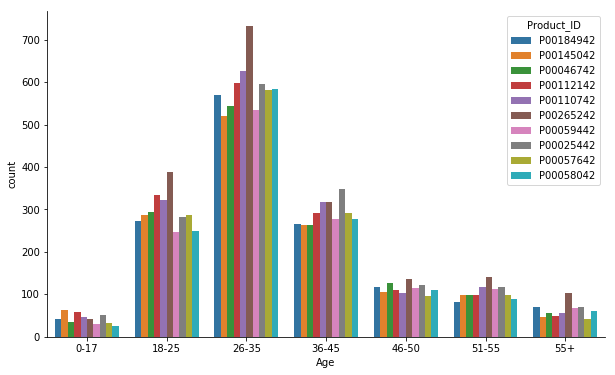

In [39]:
plt.pyplot.figure(figsize=(10,6)) 
order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
seaborn.countplot(data=top10, x='Age', 
                  hue='Product_ID', order=order) 
seaborn.despine()

El Producto PO0265242 es el más consumido entre todos los rangos etarios, a excepción de 2 rangos: 0-17 y 36-45. En el primer caso, el producto más consumido consiste en el producto PO0145042, que por lidera el ránking de productos consumidos entre las edades 0-17 años. En el segundo caso, el producto más adquirido entre las personas que tienen 36-45 años es el bien PO0025442. 

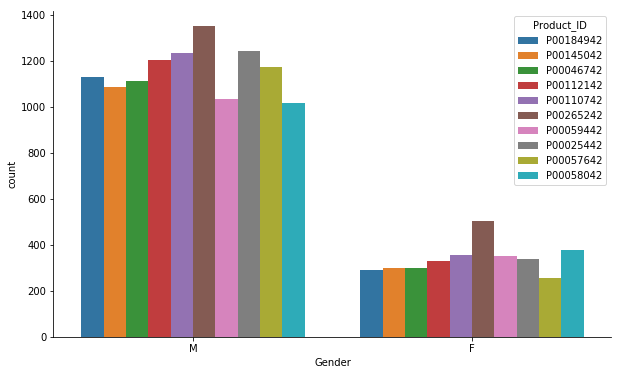

In [40]:
plt.pyplot.figure(figsize=(10,6)) 
seaborn.countplot(data=top10, x='Gender', 
                  hue='Product_ID') 
seaborn.despine()

Al analizar los productos más vendididos, distinguiendo el género, se observa que coincide tanto para hombre como para mujeres que el producto más adquirido es el PO0265242. Seguidamente, se observa que el producto que se posiciona en segundo lugar en el género femenino, es el menos adquirido por los masculinos; PO0058042.

In [41]:
top10=pd.pivot_table(top10, index='Product_ID', columns='Age', aggfunc='count')
top10

Gender                                    Product_Category_1        \
Age          0-17 18-25 26-35 36-45 46-50 51-55  55+               0-17 18-25   
Product_ID                                                                      
P00025442      52   282   595   348   122   117   70                 52   282   
P00046742      36   293   544   264   126    98   56                 36   293   
P00057642      33   288   581   291    96    99   42                 33   288   
P00058042      26   250   584   277   111    88   60                 26   250   
P00059442      30   247   535   277   115   112   68                 30   247   
P00110742      46   323   627   317   104   117   57                 46   323   
P00112142      58   335   597   292   111    98   48                 58   335   
P00145042      63   286   520   264   106    99   46                 63   286   
P00184942      43   274   570   266   118    83   70                 43   274   
P00265242      41   388   732   317   136   140  104                 41   388   

                                         
Age        26-35 36-45 46-50 51-55  55+  
Product_ID                               
P00025442    595   348   122   117   70  
P00046742    544   264   126    98   56  
P00057642    581   291    96    99   42  
P00058042    584   277   111    88   60  
P00059442    535   277   115   112   68  
P00110742    627   317   104   117   57  
P00112142    597   292   111    98   48  
P00145042    520   264   106    99   46  
P00184942    570   266   118    83   70  
P00265242    732   317   136   140  104

**5. La categoría de productos menos vendidos corresponde a productos muy costosos? Cuáles categorías de productos son más consumidas por edad? y por género?**

In [42]:
prod_less_sold = pd.DataFrame(dataset.groupby('Product_ID').size())
bottom_10 = prod_sold.sort_values(0, ascending=True)[0:141]

In [43]:
print('Los productos menos vendidos son los siguientes: ')
bottom_10[:5]

Los productos menos vendidos son los siguientes: 


,0
Product_ID,
P00056542,1
P00013442,1
P00013542,1
P00013842,1
P00206542,1


In [44]:
less_sell = bottom_10.index
less_sell

Index(['P00056542', 'P00013442', 'P00013542', 'P00013842', 'P00206542',
       'P00062442', 'P00062342', 'P00275042', 'P00314742', 'P00142542',
       ...
       'P00204042', 'P00260742', 'P00308042', 'P00135942', 'P00306542',
       'P00073342', 'P00126742', 'P00306942', 'P00338242', 'P00203942'],
      dtype='object', name='Product_ID', length=141)

In [45]:
bottom10 = pd.DataFrame(dataset, columns=["Product_ID","Age","Gender",'Purchase'])

In [46]:
bottom10=bottom10[bottom10['Product_ID'].isin(less_sell)]

In [47]:
bottom10.sort_values(by='Purchase', ascending=False)[0:10]

,Product_ID,Age,Gender,Purchase
173592,P00074542,26-35,M,203.23
424219,P00341542,55+,M,202.91
137562,P00308042,51-55,F,192.06
514546,P00315142,26-35,M,184.68
511641,P00075042,36-45,M,184.56
97045,P00135942,26-35,M,169.54
518979,P00038842,51-55,F,168.95
402677,P00292142,36-45,F,166.09
528719,P00295642,26-35,M,159.66
303737,P00166442,36-45,M,159.66


Inicialmente consideramos los productos cuyo valor se ubica por encima del 75% del total de productos vendidos. Es decir, solo se consideran aquellos bienes que superan el precio que contiene al 75% del total de observaciones.

In [48]:
bottom10_exp = bottom10[bottom10['Purchase'] > q3]
print('Del total de productos menos consumidos, solo ', len(bottom10_exp), 'se encuentran fuera del 75% de las obervaciones')

Del total de productos menos consumidos, solo  17 se encuentran fuera del 75% de las obervaciones


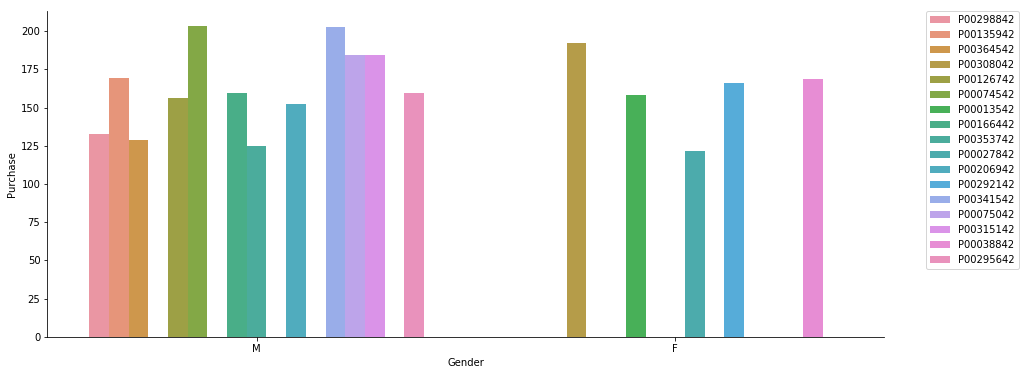

In [49]:
plt.pyplot.figure(figsize=(15,6))
seaborn.barplot(x='Gender', y='Purchase', data=bottom10_exp,
               hue='Product_ID')
plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Del total de productos menos vendidos y cuyo precio supera al precio que contiene al 75% del total de la muestra, se observa que de los 17 e los productos más caros y menos vendidos, 5 fueron adquiridos por mujeres y 12 por hombres. 

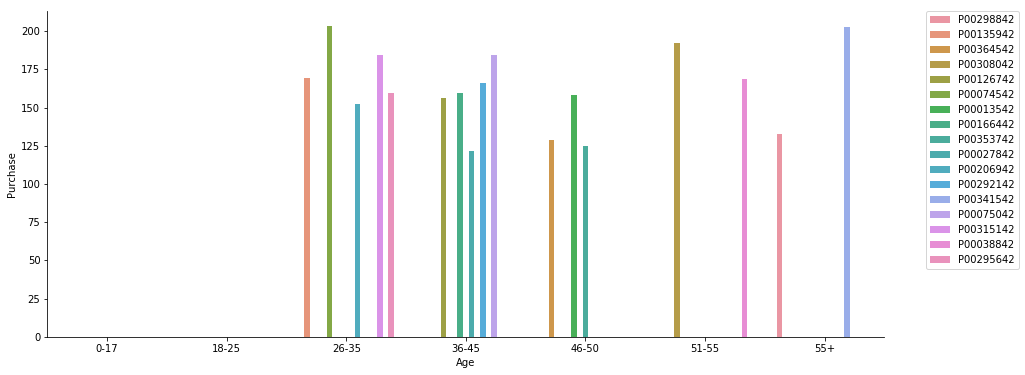

In [50]:
plt.pyplot.figure(figsize=(15,6))
seaborn.barplot(x='Age', y='Purchase', data=bottom10_exp,
               hue='Product_ID', order=order)
plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Al analizar el rango etario de los productos menos adquiridos y más costosos, se observa una concentración entre los rangos 26-35 y 36-45, que a su vez consisten en los rangos etarios que consumen productos más costosos; tal como se señaló en el punto 3.

A continuación, se analiza el caso de los productos menos adquiridos y cuyos precios se ubican por debajo del 25% de los precios del total de las observaciones. En otras palabras, se estudian los productos menos adquiridos y más baratos.

In [86]:
bottom10_chp = bottom10[bottom10['Purchase'] < q1]
print('Del total de productos menos consumidos, solo ', len(bottom10_chp), 'se encuentran fuera del 25% inferior de las obervaciones')

Del total de productos menos consumidos, solo  67 se encuentran fuera del 25% inferior de las obervaciones


In [52]:
bottom10_chp = pd.pivot_table(bottom10_chp, index='Gender', columns='Age', aggfunc='count')
bottom10_chp

Product_ID                              Purchase                    \
Age         18-25 26-35 36-45 46-50 51-55  55+    18-25 26-35 36-45 46-50   
Gender                                                                      
F             5.0   1.0   2.0   NaN   NaN  2.0      5.0   1.0   2.0   NaN   
M            23.0  14.0   7.0   6.0   2.0  5.0     23.0  14.0   7.0   6.0   

                   
Age    51-55  55+  
Gender             
F        NaN  2.0  
M        2.0  5.0

En línea con lo observado previamente, los productos menos consumidos y más económicos corresponden a consumidores entre 18 y 25 años y masculinos. 

In [87]:
bot = len(bottom10_chp+bottom10_exp)/len(bottom10)
bot

0.5957446808510638

In [55]:
bottom10_chp

Product_ID                              Purchase                    \
Age         18-25 26-35 36-45 46-50 51-55  55+    18-25 26-35 36-45 46-50   
Gender                                                                      
F             5.0   1.0   2.0   NaN   NaN  2.0      5.0   1.0   2.0   NaN   
M            23.0  14.0   7.0   6.0   2.0  5.0     23.0  14.0   7.0   6.0   

                   
Age    51-55  55+  
Gender             
F        NaN  2.0  
M        2.0  5.0

El precio del 60% de los productos menos consumidos se encuentran fuera del 50% de las observaciones que están alrededor de la mediana.

**6. Los usuarios que más compran (usuarios con más de 200 órdenes) poseen características en común? Cuáles?**

In [61]:
top_usrs = pd.DataFrame(dataset.groupby('User_ID').size())
top_usrs = top_usrs[0][top_usrs[0]>200]


In [62]:
top_usrs=list(top_usrs.index)


In [ ]:
indices=[]
for i in range(0,len(top_usrs)):
    indices.append(list(dataset["User_ID"]).index(top_usrs[i]))

In [119]:
dataset_usrs=dataset.iloc[indices]

Text(0.5,1,'Mayores compradores por edad y género')

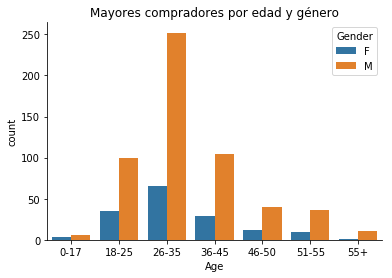

In [130]:
seaborn.countplot(x="Age",data=dataset_usrs,order = ["0-17","18-25","26-35","36-45","46-50","51-55","55+"],hue="Gender")
seaborn.despine()
plt.pyplot.title("Mayores compradores por edad y género")

La gran mayoría de los usuarios que realizaron más de 200 compras son hombres, casi triplicando el número de mujeres. A su vez, más del 40% de los grandes usuarios se encuentran entre los 26 y 35 años de edad, seguido por aquellos usuarios entre 18 y 25 años y 36 y 45 años, cada uno con un 20% del total. Es decir que entre los 18 y 45 años se encuentra el 80% de todos los usuarios que hicieron más de 200 compras.Viendo la cantidad de estos usuarios por edad y género, se observa que las proporciones entre hombres y mujeres se mantienen estables a lo largo de los distintos rangos etarios.

([<matplotlib.axis.XTick at 0x7fb48dd08c50>,
 <a list of 2 Text xticklabel objects>)

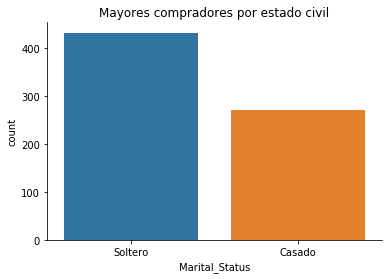

In [133]:
seaborn.countplot(x="Marital_Status",data=dataset_usrs)
seaborn.despine()
plt.pyplot.title("Mayores compradores por estado civil")
plt.pyplot.xticks([0,1],["Soltero","Casado"])

Text(0.5,1,'Mayores compradores por edad y estado civil')

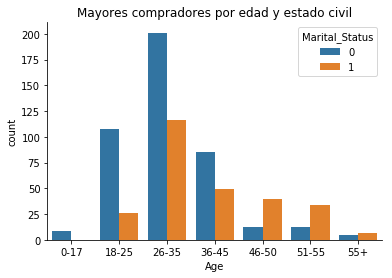

In [134]:
seaborn.countplot(x="Age",data=dataset_usrs,order = ["0-17","18-25","26-35","36-45","46-50","51-55","55+"],hue="Marital_Status")
seaborn.despine()
plt.pyplot.title("Mayores compradores por edad y estado civil")

Analizando el estado marital de estos usuarios, se observa que aproximadamente el 60% de estos son solteros mientras que los restantes se encuentran casados, aunque esta relación varía notablemente a lo largo de los años. Hasta los 45 años la proporción de solteros es mayor a los casados, mientras que pasada esa edad la proporción de estos últimos supera a la de los primeros con amplitud. De esta gráfico, se puede observar también que el grupo que más usuarios concentra es aquél que contiene solteros entre 26 y 35 años, y que acumula aproximadamente el 28% del total.

Text(0.5,1,'Mayores compradores por ocupación')

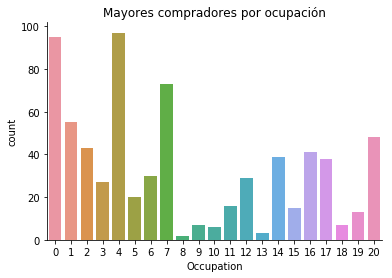

In [132]:
seaborn.countplot(x="Occupation",data=dataset_usrs)
seaborn.despine()
plt.pyplot.title("Mayores compradores por ocupación")

En cuanto a la ocupación de los grandes usuarios, también se distinguen unas pocas actividades que concentran una gran proporción del total, estas son la ocupación 0, 4 y 7, que en total contemplan más del 35% del total de usuarios.

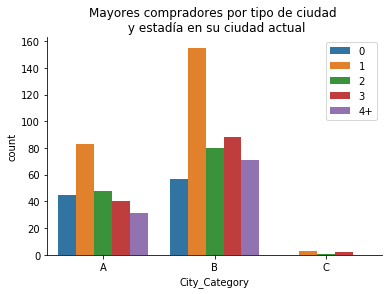

In [144]:
seaborn.countplot(x="City_Category",data=dataset_usrs,hue="Stay_In_Current_City_Years",hue_order=["0","1","2","3","4+"],order=["A","B","C"])
seaborn.despine()
plt.pyplot.title("Mayores compradores por tipo de ciudad \n y estadía en su ciudad actual")
plt.pyplot.legend(loc=1)

En cuanto a la ciudad y tiempo de estadía en esta, el recuento muestra que la gran mayoría de los compradores provienen de las ciudades de tipo B, y dentro de esta sobresale el grupo de personas que ha estado solamente un año en esta ciudad y representa más del 20% del total de grandes usuarios. Este mismo grupo de personas es el más numeroso también entre los grandes usuarios de las ciudades de tipo A. Por último, la proporción de usuarios provenientes de ciudades tipo C es casi nula.

**7. Analizar la distribución de ventas por edad, género y estado civil. Graficar.**

In [70]:
dataset_1 = ['Age', 'Gender', 'Marital_Status', 'Purchase']
dataset_2 = pd.DataFrame(dataset[dataset_1])

*Distribución de las ventas por edad*

In [160]:
dataset_age = dataset_2[['Age', 'Gender', 'Purchase']]

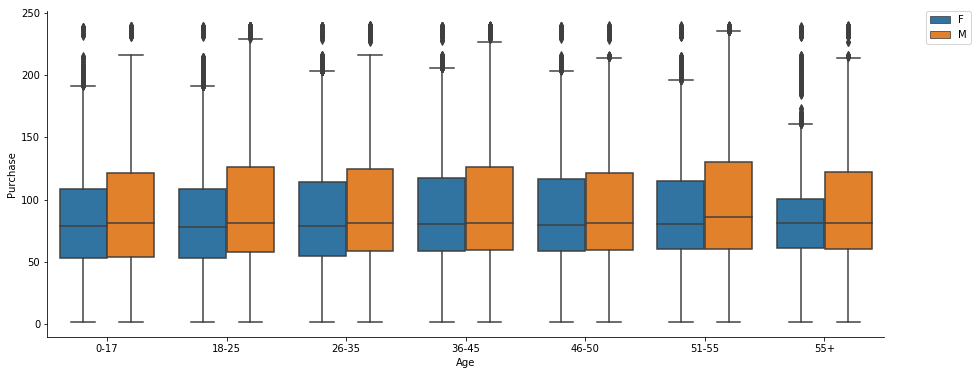

In [161]:
plt.pyplot.figure(figsize=(15,6))
seaborn.boxplot(data=dataset_age,
                x='Age', y='Purchase',
                hue='Gender', order=order)
plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Del análisis de la distribución de las ventas por edad y por sexo, surge que la mediana de compra de los hombres siempre se ubica por encima (o en igual posición) que las mujeres, independientemente el rango etario considerado. 
A su vez, el 3° rango intercuartílico de los hombres (que acumula el 75% de las observaciones) siempre se ubica por encima de las mujeres, mientras que el primer rango intercuartílico de las mujeres siempres se ubica por debajo en relación al de los hombres. 
Lo señalado anteriormente, permite sugerir que los hombres presentan una mayor prediposición en adquirir productos más costosos frente a las mujeres.

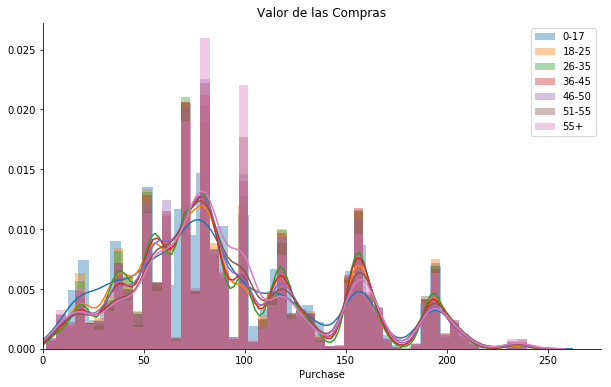

In [323]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset_age['Age'] == '0-17']['Purchase'], 
                label='0-17')
seaborn.distplot(
    dataset[dataset_age['Age'] == '18-25']['Purchase'], 
                label='18-25')
seaborn.distplot(
    dataset[dataset_age['Age'] == '26-35']['Purchase'], 
                label='26-35')
seaborn.distplot(
    dataset[dataset_age['Age'] == '36-45']['Purchase'], 
                label='36-45')
seaborn.distplot(
    dataset[dataset_age['Age'] == '46-50']['Purchase'], 
                label='46-50')
seaborn.distplot(
    dataset[dataset_age['Age'] == '51-55']['Purchase'], 
                label='51-55')
seaborn.distplot(
    dataset[dataset_age['Age'] == '55+']['Purchase'], 
                label='55+')
seaborn.despine()
plt.pyplot.title("Valor de las Compras")
plt.pyplot.xlim(0,None)
plt.pyplot.legend()

*Distribución de las ventas por Estado Civil*

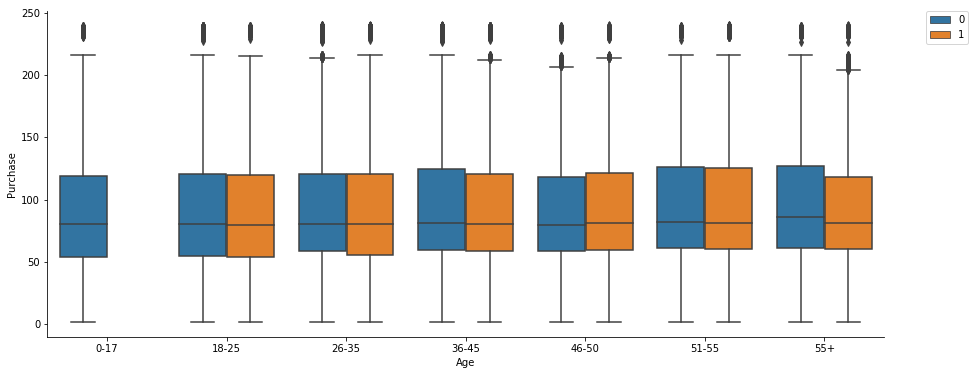

In [324]:
plt.pyplot.figure(figsize=(15,6))
seaborn.boxplot(data=dataset_2,
                x='Age', y='Purchase',
                hue='Marital_Status', order=order)
plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

La distribución de las compras por edad y estado civil deja en evidencia que las personas solteras adquieren productos más costosos cuando superan los 55 años y cuando se encuentran entre los 36-45 años, considerando aún el rango etario 0-17, que por generalidad son personas aún solteras. En el resto de los rangos etarios definidos, las personas casadas adquieren productos más costosos.

**8. Qué categoría de ciudad posee el mayor porcentaje de compras dada la proporción de usuarios que contiene? Graficar.**

In [366]:
dataset_2_1 = pd.DataFrame(dataset, columns=['City_Category', 'User_ID'])

In [367]:
usuarios = dataset.drop_duplicates('User_ID')

In [368]:
#Cantidad de USUARIOS en cada ciudad.
dataset_2_1_C = pd.DataFrame(usuarios.groupby('City_Category').size().reset_index())
dataset_2_1_C.rename(columns={0:'Cantidad Usuarios'}, inplace=True)
dataset_2_1_C

,City_Category,Cantidad Usuarios
0,A,1045
1,B,1707
2,C,3139


In [369]:
#Cantidad de ORDENES en cada ciudad.
dataset_2_1_P = pd.DataFrame(dataset.groupby('City_Category').size().reset_index())
dataset_2_1_P.rename(columns={0:'Cantidad Ordenes'}, inplace=True)
dataset_2_1_P

,City_Category,Cantidad Ordenes
0,A,144638
1,B,226493
2,C,166446


In [370]:
#Cantidad Total Usuarios
q_usuarios = dataset_2_1_C['Cantidad Usuarios'].sum()

#Cantidad Total Órdenes
q_ordenes = dataset_2_1_P['Cantidad Ordenes'].sum()

In [371]:
tabla = pd.merge(dataset_2_1_C, dataset_2_1_P, how='left', on= 'City_Category')
tabla['Compra Promedio por usuario'] = dataset_2_1_P['Cantidad Ordenes'] / dataset_2_1_C['Cantidad Usuarios']
tabla['% Usuarios'] = tabla['Cantidad Usuarios'] / q_usuarios
tabla['% Ordenes'] = tabla['Cantidad Ordenes'] / q_ordenes
tabla['Ciudad más demandante'] = tabla['% Ordenes'] - tabla['% Usuarios']
tabla


,City_Category,Cantidad Usuarios,Cantidad Ordenes,Compra Promedio por usuario,% Usuarios,% Ordenes,Ciudad más demandante
0,A,1045,144638,138.409569,0.177389,0.269055,0.091666
1,B,1707,226493,132.684827,0.289764,0.421322,0.131558
2,C,3139,166446,53.025167,0.532847,0.309623,-0.223224


Del análisis sobre la cantidad de órdenes por ciudad, surge que la ciudad "B" lidera el ránking al concentrar el 42% del total de ordenes analizadas. En segundo lugar, se ubica la ciudad "C" que concentra el el 31% del total de órdenes y la ciudad "A" completa el 27% restante.
No obstante, al considerar la cantidad de usuarios que concentra cada ciudad, surge que "C" contiene el 53% del total de consumidores en la muestra, mientras que las ciudades "A" y "B" contran el 18% y 29%, respectivamente.
Por lo tanto, si bien la ciudad "C" se ubica en segundo lugar al considerar la cantidad de órdenes ejecutadas, concentra a más de la mitad de los compradores, por lo que debería esperarse un mayor nivel de órdenes.

Lo comentado previamente se refuerza al observar que la cantidad de ordenes promedio por usuario en la ciudad "C" representan menos de la mitad de las órdenes promedio por usuario en las ciudades "A" y "B".

In [334]:
graph = pd.DataFrame(tabla, columns=['City_Category', '% Usuarios', '% Ordenes'])

,City_Category,% Usuarios,% Ordenes
0,A,0.177389,0.269055
1,B,0.289764,0.421322
2,C,0.532847,0.309623


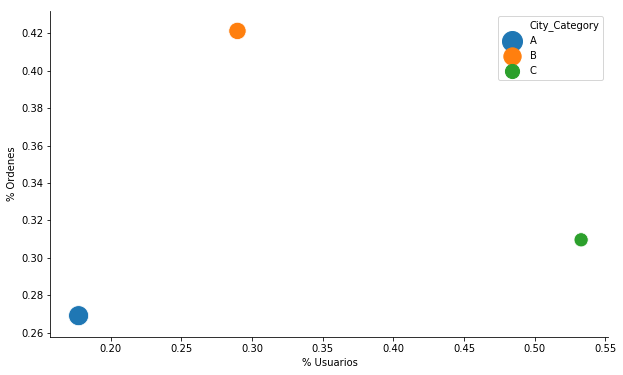

In [361]:
plt.pyplot.figure(figsize=(10,6))
seaborn.scatterplot(x="% Usuarios", y="% Ordenes", 
                    hue="City_Category", size='City_Category', sizes=(200,400),
                     data=graph)
seaborn.despine()

En el Scatter-Plot se logra apreciar que la ciudad "B" se ubica por encima de la línea de equidistribución mientras que la ciudad "C" se ubica por debajo de la línea de equidistribución.
La línea de equidistribución es una recta que imaginaria de correspondencia 1-1 entre el % de órdenes y el % de usuarios. En otras palabras, si el % de ordenes coincidiera con el % de usuarios, todos los puntos se ubicarían sobre una recta de 45° que parte del origen.
Esto implica, que en la ciudad "B" la proporción de órdenes supera ampliamente la proporción de usuarios radicados en la ciudad "B". Por otro lado, en la ciudad "C" se presenta un caso opuesto, dado que el porcentaje de usuarios supera ampliamente el % de órdenes.
En cuanto a la ciudad "A" se observa que el % de ordenes supera levemente al % de usuarios. 

**9. Analizar la correlación entre edad y ocupación de los consumidores**

In [69]:
age_occ=pd.pivot_table(dataset[["Age","Occupation"]], index='Occupation', columns='Age',aggfunc=len)


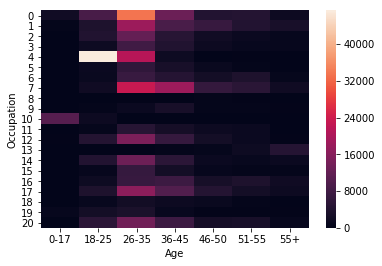

In [76]:
seaborn.heatmap(age_occ.fillna(0))

El mapa de calor muestra que en las edades mas bajas (entre 0 y 17), las ocupaciones se encuentran menos dispersos, ubicandose la mayoría en la categoría 10, y unos pocos en la categoría 0. La gran concentración en la categoría 10 podría ser un indicativo de que esta representa a los estudiantes. Luego, en el grupo 18-25, la ocupación que concentra la gran mayoría es la 4, aunque aparecen varias categorías con usuarios que no se encontraban en el grupo anterior. A medida que observamos los grupos de edad mas grandes los puestos de trabajo se distribuyen más homogéneamente a lo largo de las distintas ocupaciones, lo que no significa que todas ocupen las misma cantidad de usuarios. Esta dispersión es mayor en el grupo 26-35, pero progresivamente decae y por último, en el rango etario de 55 años o más, se da una gran concentración en la ocupación 13.   

In [78]:
city_occ=pd.pivot_table(dataset[["City_Category","Occupation"]], index='Occupation', columns='City_Category',aggfunc=len)


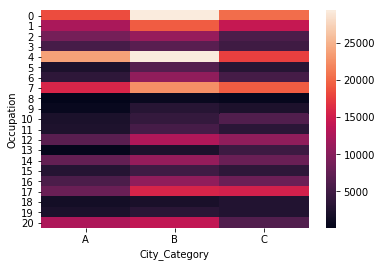

In [79]:
seaborn.heatmap(city_occ.fillna(0))

In [151]:
purch_occ=pd.pivot_table(dataset[["Purchase","Occupation"]], index='Occupation', columns='Purchase',aggfunc=len)


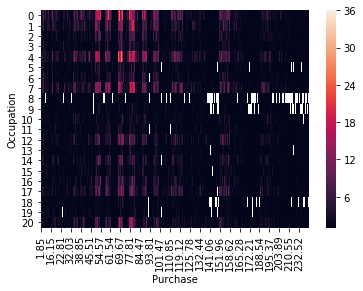

In [152]:
seaborn.heatmap(purch_occ)

In [82]:
purch_occ=pd.pivot_table(dataset[["Stay_In_Current_City_Years","Occupation"]], index='Occupation', columns="Stay_In_Current_City_Years",aggfunc=len)


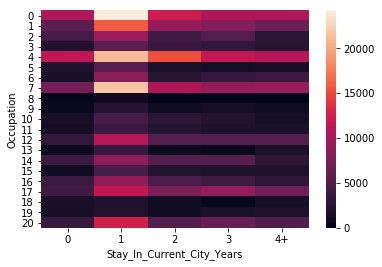

In [84]:
seaborn.heatmap(purch_occ.fillna(0))